# Gradient Descent

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is a simple algorithm for finding the minimum of a function of multiple variables.  It works on the principle of looking at the local gradient of a function then then moving in the direction where it decreases the fastest.

Note: there is no guarantee that you arrive at the global minimum instead of a local minimum.

Given a function $f({\bf x})$, where ${\bf x} = (x_0, x_1, \ldots, x_{N-1})$,
the idea is to first compute the derivative $\partial f / \partial {\bf x} = (\partial f/\partial x_0, \partial f/\partial x_1, \ldots, \partial f/\partial x_{N-1})$ and then move in the opposite direction by some fraction, $\eta$:

$${\bf x} \leftarrow {\bf x} - \eta \frac{\partial f}{\partial {\bf x}}$$

There are different ways to define what $\eta$ should be, but we'll use a fixed value.  We'll call $\eta$ the _learning rate_.

Let's demonstrate this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Test function

The [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function)
or the _banana function_ is a very difficult problem for minimization.  It
has the form:

$$f(x, y) = (a - x)^2 + b (y - x^2)^2$$

and for $a = 1$ and $b = 100$, the minimimum is at a point $(a, a^2)$.

In [2]:
def rosenbrock(x0, x1, a, b):
    return (a - x0)**2 + b*(x1 - x0**2)**2

def drosdx(x, a, b):
    x0 = x[0]
    x1 = x[1]
    return np.array([-2.0*(a - x0) - 4.0*b*(x1 - x0**2)*x0,
                     2.0*b*(x1 - x0**2)])

Let's plot the function

In [3]:
xmin = -2.0
xmax = 2.0
ymin = -1.0
ymax = 3.0

In [4]:
a = 1.0
b = 100.0

In [5]:
N = 256
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)

x2d, y2d = np.meshgrid(x, y, indexing="ij")

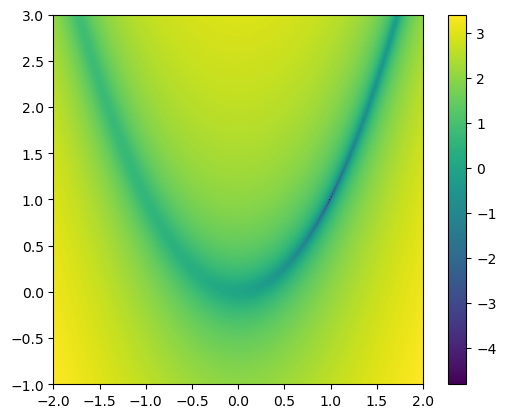

In [6]:
fig, ax = plt.subplots()

im = ax.imshow(np.log10(np.transpose(rosenbrock(x2d, y2d, a, b))),
               origin="lower", extent=[xmin, xmax, ymin, ymax])

fig.colorbar(im, ax=ax)

## Implementing gradient descent

Let's start with an initial guess.  We'll keep guessing until the change in the solution is small.

Note: our success is very sensitive to our choice of $\eta$.

In [7]:
x0 = np.array([-1.0, 1.5])

We'll set a tolerance and keep iterating until the change in the solution, `dx` is small

In [8]:
def do_descent(dfdx, x0, eps=1.e-5, eta=2.e-3, args=None, ax=None):

    # dx will be the change in the solution -- we'll iterate until this
    # is small
    dx = 1.e30
    xp_old = x0.copy()

    if args:
        grad = dfdx(xp_old, *args)
    else:
        grad = dfdx(xp_old)

    while dx > eps:

        xp = xp_old - eta * grad
        
        if ax:
            ax.plot([xp_old[0], xp[0]], [xp_old[1], xp[1]], color="C1")
            
        dx = np.linalg.norm(xp - xp_old)
        
        if args:
            grad_new = dfdx(xp, *args)
        else:
            grad_new = dfdx(xp)
            
        #eta_new = np.abs(np.transpose(xp) @ (grad_new - grad)) / np.linalg.norm(grad_new - grad)**2
        #eta = min(10*eta, eta_new)
        
        grad = grad_new
        
        xp_old[:] = xp

In [9]:
do_descent(drosdx, x0, args=(a, b), ax=ax)

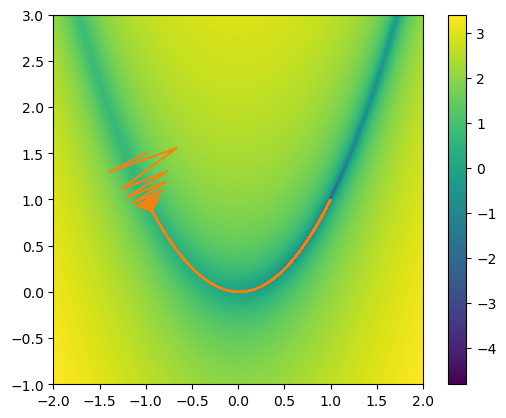

In [10]:
fig

## momentum

A variation on gradient descent is to add "momentum"
to the update.  This means that the correct depends
on the past gradients as well as the current one,
via some combination.  This has the effect of reducing
the zig-zag effect that we see in our attempt above.